In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


model_path = r"customer_engagement_index_model.pkl"
dataset_all = r"D:\Software\temp\CeDX\data/output\dataset_all.csv"

# load the saved model from file
model = sm.load(model_path)
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  PM2ov   No. Observations:                81337
Model:                            GLM   Df Residuals:                    81314
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47729.
Date:                Mon, 11 Sep 2023   Deviance:                       95458.
Time:                        15:09:25   Pearson chi2:                 8.15e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1896
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1709 

In [3]:
print(model.fittedvalues)

4         0.198863
5         0.031955
6         0.359868
10        0.848438
12        0.360582
            ...   
126502    0.103812
126503    0.222507
126504    0.431709
126505    0.487875
126506    0.455626
Length: 81337, dtype: float64


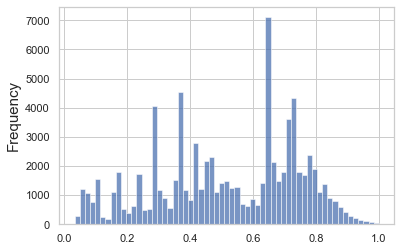

In [2]:
import seaborn as sns

sns.set(style='whitegrid')

hist = sns.histplot(model.fittedvalues)
hist.set_ylabel("Frequency", fontsize = 15)
fig = hist.get_figure()
fig.savefig("fitted_values_histogram.png") 

  category          data
0      0-9  2.325442e-08
1    10-19  8.254951e-08
2    20-29  2.076937e-07
3    30-39  3.640451e-07
4    40-49  4.646339e-07
5    50-59  3.694367e-07
6    60-69  9.501736e-07
7    70-79  1.202060e-06
8    80-89  4.569074e-07
9    90-99  8.554542e-08


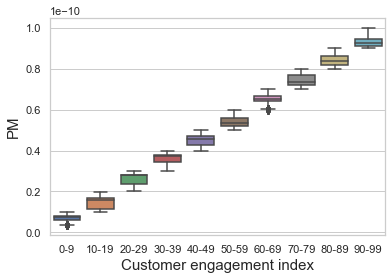

In [28]:
df_full = pd.read_csv(r"D:\HieuNV\Cedx\20230818\data\data\output\dataset_all_full_columns.csv")
PM = df_full['PM'].values

data = model.fittedvalues

# Define a function to group the data into categories
def assign_category(x):
    x = x*100
    if x < 10:
        return "0-9"
    elif x < 20:
        return "10-19"
    elif x < 30:
        return "20-29"
    elif x < 40:
        return "30-39"
    elif x < 50:
        return "40-49"
    elif x < 60:
        return "50-59"
    elif x < 70:
        return "60-69"
    elif x < 80:
        return "70-79"
    elif x < 90:
        return "80-89"
    else:
        return "90-99"
sns.set(style='whitegrid')
categories = [assign_category(x) for x in data]

# Create a data frame with the data and categories
df_a = pd.DataFrame({"data": data, "category": categories})
#print(df_a.groupby('category').count())
df_a["data"] = df_a["data"] / 10**10
sum_PM = df_a.groupby('category')['data'].sum().reset_index()
print(sum_PM)

# Draw the boxplots using Seaborn
ngu = sns.boxplot(x="category", y="data", data=df_a, order=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"])

# Add the average values to each boxplot
#averages = df_a.groupby("category")["data"].mean().values
#ngu = sns.scatterplot(x=np.arange(len(averages)), y=averages, marker="X", color="black", s=100)

# Connect the average values with a line
#ngu = sns.lineplot(x=np.arange(len(averages)), y=averages, color="black")

# Get the Figure object that contains the plot
ngu.set_ylabel("PM", fontsize = 15)
ngu.set_xlabel("Customer engagement index", fontsize = 15)

fig = ngu.get_figure()

# Save the plot to a file
fig.savefig("lineplot.png")

In [5]:
def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [6]:
cof = model.params
print(np.exp(cof.values))

[0.84292655 1.00836686 0.9960832  1.18874883 1.21670669 2.44099555
 1.09577037 1.02891315 1.06090979 1.         1.04620515 1.05624102
 1.02374782 1.01406682 1.04015232 1.00577341 1.03068423 1.00864648
 1.01835479 0.98664596 0.93885267 1.24028505 0.9164311  1.01929891]


In [7]:
df = pd.DataFrame({'Variables' : cof.index, "Coefficient" : np.round(cof.values, 5), "Odds" : np.round(np.exp(cof.values), 5), "Coefficient2" : np.round(cof.values, 2)})
df_intercept = df.iloc[[0]]
df_rest = df.iloc[1:, :].sort_values('Coefficient', ascending=False)
df = pd.concat([df_intercept, df_rest], ignore_index=True, axis=0)
mask = df['Coefficient2'].isin([0.00, -0.00, 0.01, -0.01])
#df = df[~mask]
df = df.drop(columns=['Coefficient2'], axis=1)
print(df)

               Variables  Coefficient     Odds
0              Intercept     -0.17088  0.84293
1             visit_rate      0.89241  2.44100
2                SA_cont      0.21534  1.24029
3                BATTERY      0.19615  1.21671
4                   TIRE      0.17290  1.18875
5                     mp      0.09146  1.09577
6                   chat      0.05913  1.06091
7                 ew_num      0.05472  1.05624
8     total_satisfaction      0.04517  1.04621
9       app_reserve_mean      0.03937  1.04015
10   view_product_detail      0.03022  1.03068
11                 MH_ID      0.02850  1.02891
12            coupon_use      0.02347  1.02375
13     SA_select:SA_cont      0.01912  1.01930
14           notif_v_spa      0.01819  1.01835
15             SA_select      0.01397  1.01407
16       view_test_drive      0.00861  1.00865
17             keika_max      0.00833  1.00837
18         estimate_cost      0.00576  1.00577
19                    CR      0.00000  1.00000
20           

In [6]:
df_datasetall = pd.read_csv(dataset_all)
beta_dict = df.set_index('Variables')['Coefficient'].to_dict()
print(beta_dict)

{'Intercept': 0.15874, 'visit_rate': 1.04088, 'visit_rate:keika_max': 0.33679, 'BATTERY': 0.17353, 'total_buy': 0.17206, 'SA_cont': 0.14237, 'mp': 0.11297, 'TIRE': 0.11093, 'MH_ID': 0.08717, 'app_reserve_mean': 0.08498, 'ew_num': 0.07012, 'total_satisfaction': 0.03896, 'chat': 0.03561, 'view_product_detail': 0.01568, 'coupon_use': 0.00855, 'notif_v_spa': 0.00804, 'notif_vpm': 0.00181, 'notif_vpi': 0.00132, 'CR': -0.0034, 'SA_select:SA_cont': -0.00456, 'estimate_cost': -0.00976, 'view_test_drive': -0.01265, 'SA_select': -0.05141, 'keika_max': -0.23115}


In [7]:
df_dsa = df_datasetall.copy()
#df_dsa = df_dsa.drop(columns=['PM2ov'], axis=1)
df_dsa['exp'] = beta_dict['Intercept']

for i in df['Variables'].values.tolist():
    if i != 'Intercept':
        print(i)
        if ':' in i:
            j = i.split(':')
            print(j)
            df_dsa['exp'] += df_dsa[j[0]] * df_dsa[j[1]] * beta_dict[i]
        else:
            df_dsa['exp'] += df_dsa[i] * beta_dict[i]

df_dsa['y'] = sigmoid(df_dsa['exp'].values)
df_dsa.to_excel(r"D:\HieuNV\Cedx\20230818\data\data\output\dataset_all_sigmoided.xlsx", index=False)
print(df_dsa)


visit_rate
visit_rate:keika_max
['visit_rate', 'keika_max']
BATTERY
total_buy
SA_cont
mp
TIRE
MH_ID
app_reserve_mean
ew_num
total_satisfaction
chat
view_product_detail
coupon_use
notif_v_spa
notif_vpm
notif_vpi
CR
SA_select:SA_cont
['SA_select', 'SA_cont']
estimate_cost
view_test_drive
SA_select
keika_max
       keika_max  total_buy  TIRE  BATTERY  visit_rate  SA_cont   mp  MH_ID  \
0              5          1     0        0        60.0      1.0  0.0    1.0   
1              5          1     0        0        80.0      1.0  0.0    1.0   
2              3          1     0        2       100.0      0.0  0.0    1.0   
3              3          1     0        0       100.0      0.0  0.0    1.0   
4              3          1     0        0       100.0      1.0  0.0    0.0   
...          ...        ...   ...      ...         ...      ...  ...    ...   
80266          5          1     0        0        80.0      0.0  0.0    0.0   
80267          5          1     2        1        80.0      0